In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df_kc_house_propre = pd.read_csv("df_kc_house_propre.csv")

In [3]:
df_kc_house_propre.head(3)

,Unnamed: 0,price,bedrooms,bathrooms,sqft_living,waterfront,condition,grade,zipcode,lat,long
0,0,221900.0,3,1.00,1180,0,3,7,98178,47.5112,-122.257
1,1,538000.0,3,2.25,2570,0,3,7,98125,47.7210,-122.319
2,2,180000.0,2,1.00,770,0,3,6,98028,47.7379,-122.233


In [4]:
############################################################
##################### PREMIER MODELE #######################
############################################################

In [5]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import train_test_split

# Initialisation de l'estimateur 

y = df_kc_house_propre["price"]
X = df_kc_house_propre.drop("price", axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

# Choisir et importer le modèle

model = KNeighborsRegressor(n_neighbors=5)

print(model, type(model))

KNeighborsRegressor() <class 'sklearn.neighbors._regression.KNeighborsRegressor'>


In [6]:
# On entraine le modèle 

trained_model = model.fit(X_train,y_train)

print(trained_model, type(trained_model))

KNeighborsRegressor() <class 'sklearn.neighbors._regression.KNeighborsRegressor'>


In [7]:
# On évalue le modèle 

trained_model.score(X_test,y_test)

0.4677731613615128

In [8]:
# On fait la prédiction

predict = trained_model.predict(X_test.head(1))
real = y.head(1).values

print(f"la valeur prédite est {predict}, alors que la valeur réelle est {real}")

la valeur prédite est [526600.], alors que la valeur réelle est [221900.]


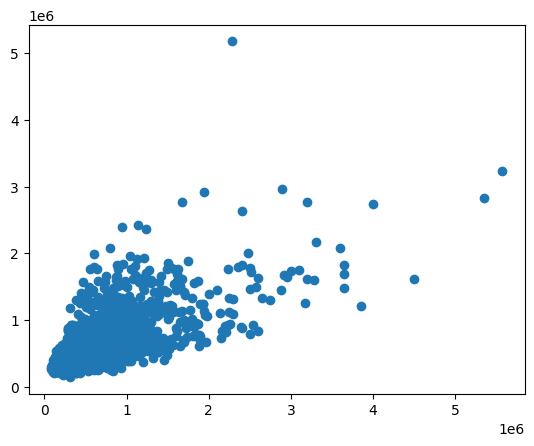

In [9]:
plt.scatter(y_test, trained_model.predict(X_test))


In [10]:
###########################################################
#################### MEILLEUR MODELE ######################
###########################################################

In [11]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

# Initialisation de l'estimateur 

y = df_kc_house_propre["price"]
X = df_kc_house_propre.drop("price", axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

from sklearn.preprocessing import MinMaxScaler # pour axe x et axe y , avoir une valeur de 0 a 1     x - min / min - max 

minmax = MinMaxScaler()
X_train_min_max = minmax.fit_transform(X_train) # calculez la valeur de min et max

from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor(n_neighbors=5)
trained_model = model.fit(X_train_min_max,y_train)

# pre-processing de X_test
X_test_min_max = minmax.transform(X_test)# pas fit, pour pas qu'il y a 2 fit différents, on recalcule pas la valeur de min et max

# scoring
trained_model.score(X_test_min_max,y_test)

0.7665845969541207

In [16]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
import pickle
# Initialisation de l'estimateur 

y = df_kc_house_propre["price"]
X = df_kc_house_propre.drop("price", axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

numeric_features = ["sqft_living","bedrooms","bathrooms","lat","long"]


from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor

numeric_transformer = Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('stdscaler', MinMaxScaler()),
        ])


# On cree un pre-processeur pour les variables catégorielles
categorial_features = [ "zipcode","waterfront","condition","grade"]

from sklearn.preprocessing import OneHotEncoder
categorical_transformer = OneHotEncoder(sparse=True)

# a l'aide de la classe ColumnTransformer, 
# on déclare à quelles variables on applique quel transformer
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorial_features)
    ]
)


from sklearn.neighbors import KNeighborsRegressor
knn_4 = KNeighborsRegressor(n_neighbors=5)

pipe = Pipeline([
     ('prep', preprocessor),
     ('knn', knn_4)
])

# Entrainement sur X_train
trained_pipe = pipe.fit(X_train,y_train)

# prediction sur X_test
trained_pipe.predict(X_test)

# scoring sur X_test
trained_pipe.score(X_test,y_test)


# Enregistrer le modèle entraîné avec pickle
with open('trained_pipe.pkl', 'wb') as f:
    pickle.dump(trained_pipe, f)

/home/apprenant/miniconda3/envs/env_projet_final/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


0.8208650996071847

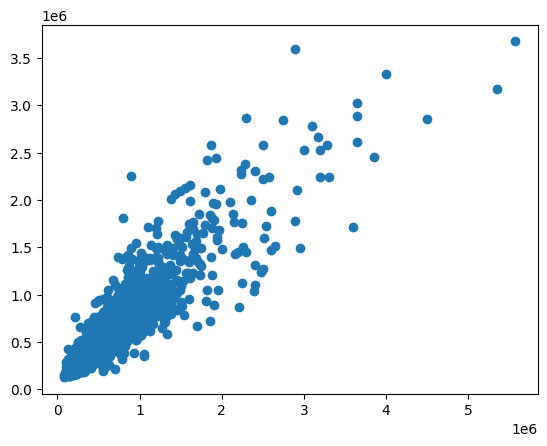

In [14]:
plt.scatter(y_test, trained_pipe.predict(X_test)
)


In [13]:
df_kc_house_propre.head(3)

,Unnamed: 0,price,bedrooms,bathrooms,sqft_living,waterfront,condition,grade,zipcode,lat,long
0,0,221900.0,3,1.00,1180,0,3,7,98178,47.5112,-122.257
1,1,538000.0,3,2.25,2570,0,3,7,98125,47.7210,-122.319
2,2,180000.0,2,1.00,770,0,3,6,98028,47.7379,-122.233
